In [ ]:
# 구글 드라이브 불러오기

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fxcmpy
!pip install socketio

  Created wheel for socketIO-client: filename=socketIO_client-0.7.2-py3-none-any.whl size=23712 sha256=8e1465fa180be02e32ad9aaba71776baff7ba51b38d32edf65ed5f4c674d6a76
  Stored in directory: c:\users\sungh\appdata\local\pip\cache\wheels\a6\a0\fd\b293fb272e08e00a179ae0a4e6e58fbe73279d662ec531d559
Successfully built socketIO-client
  Created wheel for socketio: filename=socketio-0.2.1-py3-none-any.whl size=7701 sha256=0c5bc4fb2185ab0cfff2fef3d5ba0987b9c0b927819e3cf4afbe236476e00352
  Stored in directory: c:\users\sungh\appdata\local\pip\cache\wheels\8c\49\6a\df1137711e2f7c4e3536194206c54e24fb63fee6cc7fea3a5e
  Running setup.py clean for netifaces
Successfully built socketio
Failed to build netifaces
  Attempting uninstall: setuptools
    Found existing installation: setuptools 49.2.0.post20200714
    Uninstalling setuptools-49.2.0.post20200714:
      Successfully uninstalled setuptools-49.2.0.post20200714
    Running setup.py install for netifaces: started
    Running setup.py install fo

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\sungh\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\sungh\\AppData\\Local\\Temp\\pip-install-vtc48ji2\\netifaces\\setup.py'"'"'; __file__='"'"'C:\\Users\\sungh\\AppData\\Local\\Temp\\pip-install-vtc48ji2\\netifaces\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\sungh\AppData\Local\Temp\pip-wheel-1ri85lvk'
       cwd: C:\Users\sungh\AppData\Local\Temp\pip-install-vtc48ji2\netifaces\
  Complete output (5 lines):
  running bdist_wheel
  running build
  running build_ext
  building 'netifaces' extension
  error: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/
  ----------------------------------------
  ERROR: Failed building wheel for netifa

In [ ]:
import fxcmpy
api = fxcmpy.fxcmpy(config_file='fxcm.cfg', server='demo')

OSError: Can not open config file: fxcm.cfg

## The FXCM Trading Platform

### Retrieving Data

#### Retrieving Tick Data

In [ ]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [ ]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [ ]:
start = dt.datetime(2018, 6, 25)
stop = dt.datetime(2018, 6, 30)

In [ ]:
td = tdr('EURUSD', start, stop)

In [ ]:
td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1963779 entries, 06/24/2018 21:00:12.290 to 06/29/2018 20:59:00.607
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 44.9+ MB


In [ ]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1963779 entries, 2018-06-24 21:00:12.290000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 44.9 MB


In [ ]:
td.get_data().head()

,Bid,Ask
2018-06-24 21:00:12.290,1.1662,1.16660
2018-06-24 21:00:16.046,1.1662,1.16650
2018-06-24 21:00:22.846,1.1662,1.16658
2018-06-24 21:00:22.907,1.1662,1.16660
2018-06-24 21:00:23.441,1.1662,1.16663


In [ ]:
sub = td.get_data(start='2018-06-29 12:00:00', 
                  end='2018-06-29 12:15:00')

In [ ]:
sub.head()

,Bid,Ask
2018-06-29 12:00:00.011,1.16497,1.16498
2018-06-29 12:00:00.071,1.16497,1.16497
2018-06-29 12:00:00.079,1.16497,1.16498
2018-06-29 12:00:00.091,1.16495,1.16498
2018-06-29 12:00:00.205,1.16496,1.16498


In [ ]:
sub['Mid'] = sub.mean(axis=1)

In [ ]:
sub['SMA'] = sub['Mid'].rolling(1000).mean()

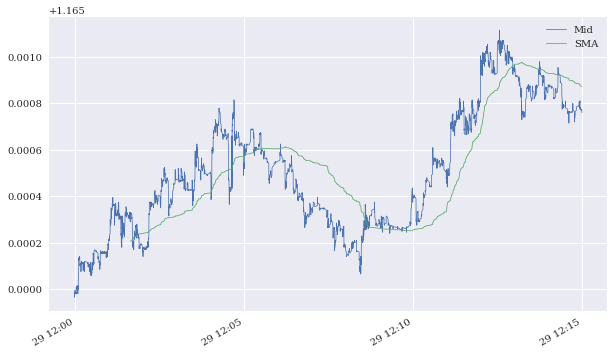

In [ ]:
sub[['Mid', 'SMA']].plot(figsize=(10, 6), lw=0.75);

##### Retrieving Candles Data

In [ ]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [ ]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [ ]:
start = dt.datetime(2018, 5, 1)
stop = dt.datetime(2018, 6, 30)

In [ ]:
period = 'H1'

In [ ]:
candles = cdr('EURUSD', start, stop, period)

In [ ]:
data = candles.get_data()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1080 entries, 2018-04-29 21:00:00 to 2018-06-29 20:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   1080 non-null   float64
 1   BidHigh   1080 non-null   float64
 2   BidLow    1080 non-null   float64
 3   BidClose  1080 non-null   float64
 4   AskOpen   1080 non-null   float64
 5   AskHigh   1080 non-null   float64
 6   AskLow    1080 non-null   float64
 7   AskClose  1080 non-null   float64
dtypes: float64(8)
memory usage: 75.9 KB


In [ ]:
data[data.columns[:4]].tail()

,BidOpen,BidHigh,BidLow,BidClose
2018-06-29 16:00:00,1.16768,1.16820,1.16731,1.16769
2018-06-29 17:00:00,1.16769,1.16826,1.16709,1.16781
2018-06-29 18:00:00,1.16781,1.16816,1.16668,1.16684
2018-06-29 19:00:00,1.16684,1.16792,1.16638,1.16774
2018-06-29 20:00:00,1.16774,1.16904,1.16758,1.16816


In [ ]:
data[data.columns[4:]].tail()

,AskOpen,AskHigh,AskLow,AskClose
2018-06-29 16:00:00,1.16769,1.16820,1.16732,1.16771
2018-06-29 17:00:00,1.16771,1.16827,1.16711,1.16782
2018-06-29 18:00:00,1.16782,1.16817,1.16669,1.16686
2018-06-29 19:00:00,1.16686,1.16794,1.16640,1.16775
2018-06-29 20:00:00,1.16775,1.16907,1.16760,1.16861


In [ ]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)

In [ ]:
data['SMA1'] = data['MidClose'].rolling(30).mean()
data['SMA2'] = data['MidClose'].rolling(100).mean()

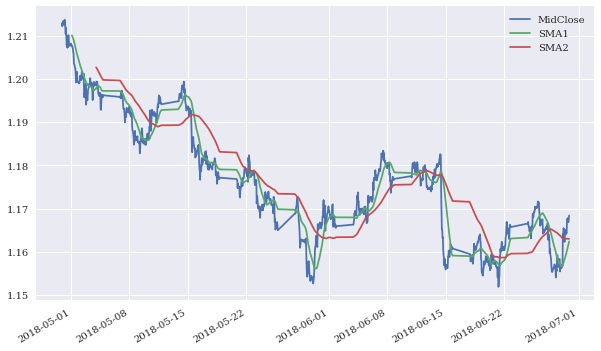

In [ ]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10, 6));

### Working with the API

fxcm 계정이 필요한 관계로 생략